In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
forest_fire_data = pd.read_csv('C://Projects//Forest-Fires//Portugal//data//forestfires.csv')
forest_fire_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [24]:
forest_fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [25]:
forest_fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [26]:
forest_fire_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [30]:
from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer(method='yeo-johnson') 
forest_fire_data['area'] = pt.fit_transform(forest_fire_data[['area']])

In [31]:
X = forest_fire_data.drop(["area"],axis = 1)
y = forest_fire_data["area"]

In [32]:
y

0     -0.933081
1     -0.933081
2     -0.933081
3     -0.933081
4     -0.933081
         ...   
512    0.979977
513    1.655856
514    1.215026
515   -0.933081
516   -0.933081
Name: area, Length: 517, dtype: float64

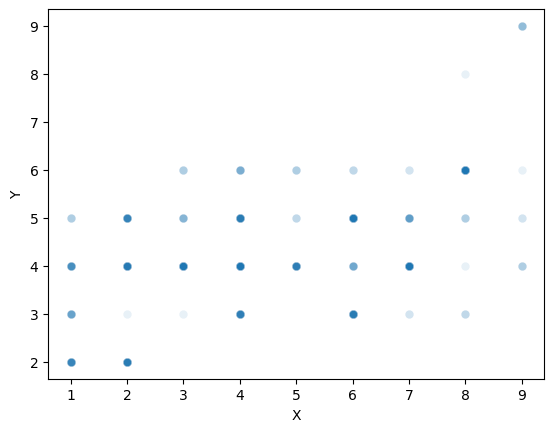

In [33]:
sns.scatterplot(data=X, x='X', y='Y', alpha=0.1, size=None, sizes=(300, 300))
plt.show()

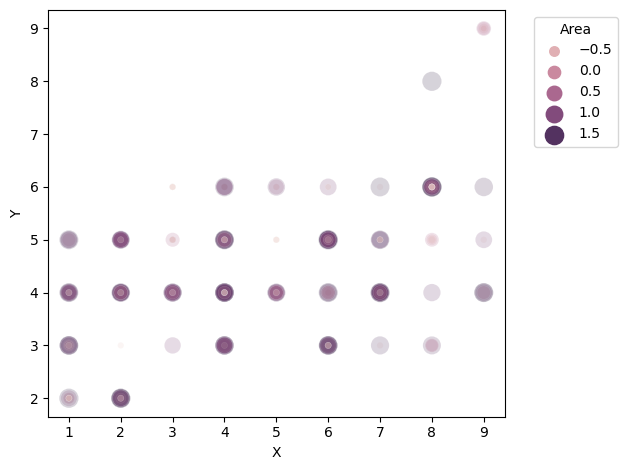

In [34]:
sns.scatterplot(
    data=forest_fire_data,
    x='X',
    y='Y',
    hue='area',
    size='area',
    alpha=0.2,
    sizes=(20, 200)
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Area')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

Correlation of input features to target variable area

In [35]:
corr_2D = forest_fire_data.drop(["month","day"],axis = 1).corr()
corr_2D['area'].sort_values(ascending=False)

area               1.000000
yeojohnson_area    1.000000
wind               0.073422
DC                 0.071846
DMC                0.058384
X                  0.056994
FFMC               0.048784
Y                  0.046408
temp               0.039026
rain               0.033264
ISI               -0.005598
RH                -0.038510
Name: area, dtype: float64

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

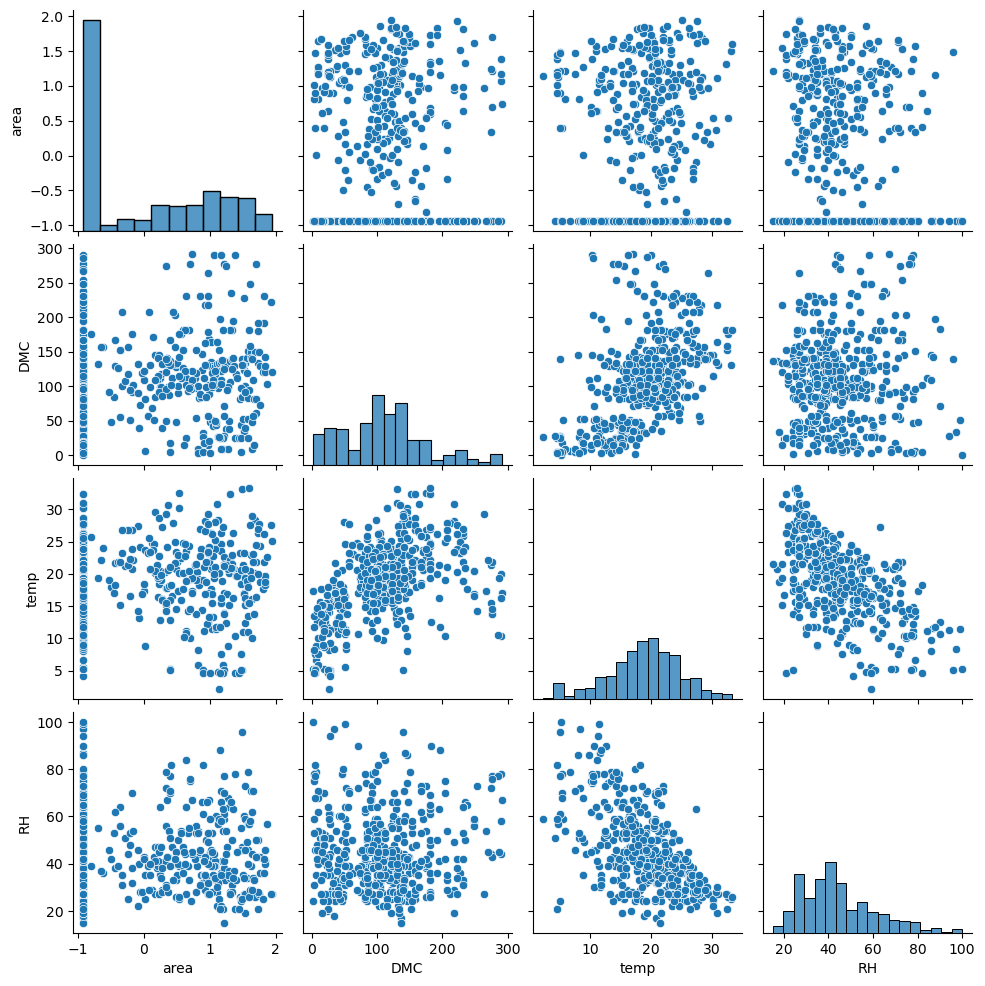

In [36]:
cols = ['area', 'DMC', 'temp', 'RH']
sns.pairplot(forest_fire_data[cols], height=2.5)
plt.show()

In [37]:
X['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [38]:
X['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [39]:
X = X.drop(["month","day"],axis = 1)

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [42]:
# Align the test and validation sets with training features
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression - MSE: {lr_mse}, MAE: {lr_mae}, R2: {lr_r2}")

Linear Regression - MSE: 8.960918991171317e-31, MAE: 7.552441133311205e-16, R2: 1.0


In [45]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f"Decision Tree - MSE: {dt_mse}, MAE: {dt_mae}, R2: {dt_r2}")

Decision Tree - MSE: 0.00019706473804319743, MAE: 0.007767667099785627, R2: 0.9997795102874656


In [46]:
rf_model = RandomForestRegressor(random_state=42,max_depth=15,n_estimators=50,n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)
rf_mse = mean_squared_error(y_val, rf_preds)
rf_mae = mean_absolute_error(y_val, rf_preds)
rf_r2 = r2_score(y_val, rf_preds)
print(f"Random Forest Regressor - MSE: {rf_mse}, MAE: {rf_mae}, R2: {rf_r2}")

Random Forest Regressor - MSE: 5.473827438488366e-05, MAE: 0.00430376430820218, R2: 0.9999497037356694


In [47]:
svr_model = SVR(kernel='linear', C=10, epsilon=0.2)
svr_model.fit(X_train, y_train)
# X_test_sampled = X_test[:len(X_test) // 100]
# y_test_sample = y_test[:len(y_test) // 100]
svr_preds = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_r2 = r2_score(y_test, svr_preds)

print(f"SVR - MSE: {svr_mse}, MAE: {svr_mae}, R2: {svr_r2}")

SVR - MSE: 0.023017073682242515, MAE: 0.13467521623409434, R2: 0.9742468997245511


In [48]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=50, max_depth=15, learning_rate=0.1,n_jobs=-1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"XGBoost Regressor - MSE: {xgb_mse}, MAE: {xgb_mae}, R2: {xgb_r2}")

XGBoost Regressor - MSE: 0.0004244929816402457, MAE: 0.012869227416851278, R2: 0.9995250477765625


In [49]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_preds = adaboost_model.predict(X_test)

adaboost_mse = mean_squared_error(y_test, adaboost_preds)
adaboost_mae = mean_absolute_error(y_test, adaboost_preds)
adaboost_r2 = r2_score(y_test, adaboost_preds)

print(f"AdaBoost Regressor - MSE: {adaboost_mse}, MAE: {adaboost_mae}, R2: {adaboost_r2}")

AdaBoost Regressor - MSE: 0.0029662653939258074, MAE: 0.025795268414015027, R2: 0.9966811363082919


In [50]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('dt', dt_model)
])

ensemble_model.fit(X_train, y_train)

ensemble_preds = ensemble_model.predict(X_test)
ensemble_mse = mean_squared_error(y_test, ensemble_preds)
ensemble_mae = mean_absolute_error(y_test, ensemble_preds)
ensemble_r2 = r2_score(y_test, ensemble_preds)

print(f"Ensemble - MSE: {ensemble_mse}, MAE: {ensemble_mae}, R2: {ensemble_r2}")

Ensemble - MSE: 0.0001310425305418536, MAE: 0.0056920811736598164, R2: 0.9998533805176113
